In [1]:
import pandas as pd
import numpy as np

# Read prediction results

In [2]:
roots = ['020', '021', '022']
root_paths = ['root_folder/root_'+r+'/results/' for r in roots]

In [3]:
# root_paths = ['root_folder/root_020/results/', 'root_folder/root_021/results/', 'root_folder/root_022/results/']
model_types = ['GAT', 'GAT_Edge', 'GATv2', 'GCN', 'SAGE', 'GIN', 'GINE']

In [4]:
def get_results(model_types, root_paths, roots):
    rmse_dict = dict()
    pcc_dict = dict()
    for m in model_types:
        tmp_rmse = []
        tmp_pcc = []
        for r in root_paths:
            file = r + 'test_result_' + m + '-EP300-SW801010_GDSC.csv'
            res = pd.read_csv(file, header=None)
            tmp_rmse.append(res.iloc[0, 0])
            tmp_pcc.append(res.iloc[0, 2])
        rmse_dict[m] = tmp_rmse
        pcc_dict[m] = tmp_pcc
        
#     print(rmse_dict, pcc_dict)
    rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['root_'+r for r in roots])
    pcc_df = pd.DataFrame.from_dict(pcc_dict, orient='index', columns=['root_'+r for r in roots])
    
    rmse_df['avg'] = rmse_df.iloc[:, 0:3].mean(axis=1)
    rmse_df['std'] = rmse_df.iloc[:, 0:3].std(axis=1)
    
    pcc_df['avg'] = pcc_df.iloc[:, 0:3].mean(axis=1)
    pcc_df['std'] = pcc_df.iloc[:, 0:3].std(axis=1)
    
    return rmse_df, pcc_df

In [5]:
rmse_df, pcc_df = get_results(model_types, root_paths, roots)

In [6]:
rmse_df

,root_020,root_021,root_022,avg,std
GAT,0.023846,0.024368,0.023809,0.024008,0.000312
GAT_Edge,0.023757,0.024392,0.023931,0.024026,0.000328
GATv2,0.023788,0.024211,0.023804,0.023934,0.000240
GCN,0.024607,0.025170,0.024625,0.024801,0.000320
SAGE,0.024629,0.025210,0.024454,0.024764,0.000396
GIN,0.033340,0.032760,0.033049,0.033049,0.000290
GINE,0.032388,0.033210,0.034311,0.033303,0.000965


In [7]:
pcc_df

,root_020,root_021,root_022,avg,std
GAT,0.934159,0.932905,0.933147,0.933404,0.000665
GAT_Edge,0.934616,0.932778,0.932335,0.933243,0.001210
GATv2,0.934513,0.933791,0.933054,0.933786,0.000730
GCN,0.930392,0.928813,0.928721,0.929309,0.000940
SAGE,0.930285,0.928725,0.929625,0.929545,0.000783
GIN,0.909908,0.914971,0.910927,0.911935,0.002678
GINE,0.912015,0.909944,0.901052,0.907671,0.005824


In [8]:
ctr_roots = ['023', '024', '025']
ctr_root_paths = ['root_folder/root_'+r+'/results/' for r in ctr_roots]
ctr_model_types = ['GCN', 'GAT', 'GIN']

In [9]:
ctr_rmse_df, ctr_pcc_df = get_results(ctr_model_types, ctr_root_paths, ctr_roots)

In [10]:
ctr_rmse_df

,root_023,root_024,root_025,avg,std
GCN,0.025494,0.026016,0.025321,0.025610,0.000362
GAT,0.051609,0.048620,0.054305,0.051511,0.002844
GIN,0.031686,0.032193,0.032470,0.032116,0.000398


In [11]:
ctr_pcc_df

,root_023,root_024,root_025,avg,std
GCN,0.924594,0.923319,0.923919,0.923944,0.000638
GAT,0.755747,0.784914,0.747394,0.762685,0.019699
GIN,0.917447,0.915583,0.912028,0.915020,0.002753


# Plot saliency maps
There are 223 drugs in total.

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import os

In [3]:
path = 'root_folder/root_020/SaliencyMap/GNNExplainer/Bonds/GATv2/selected_drugs'

In [4]:
file_list = os.listdir(path)
len(file_list)

45

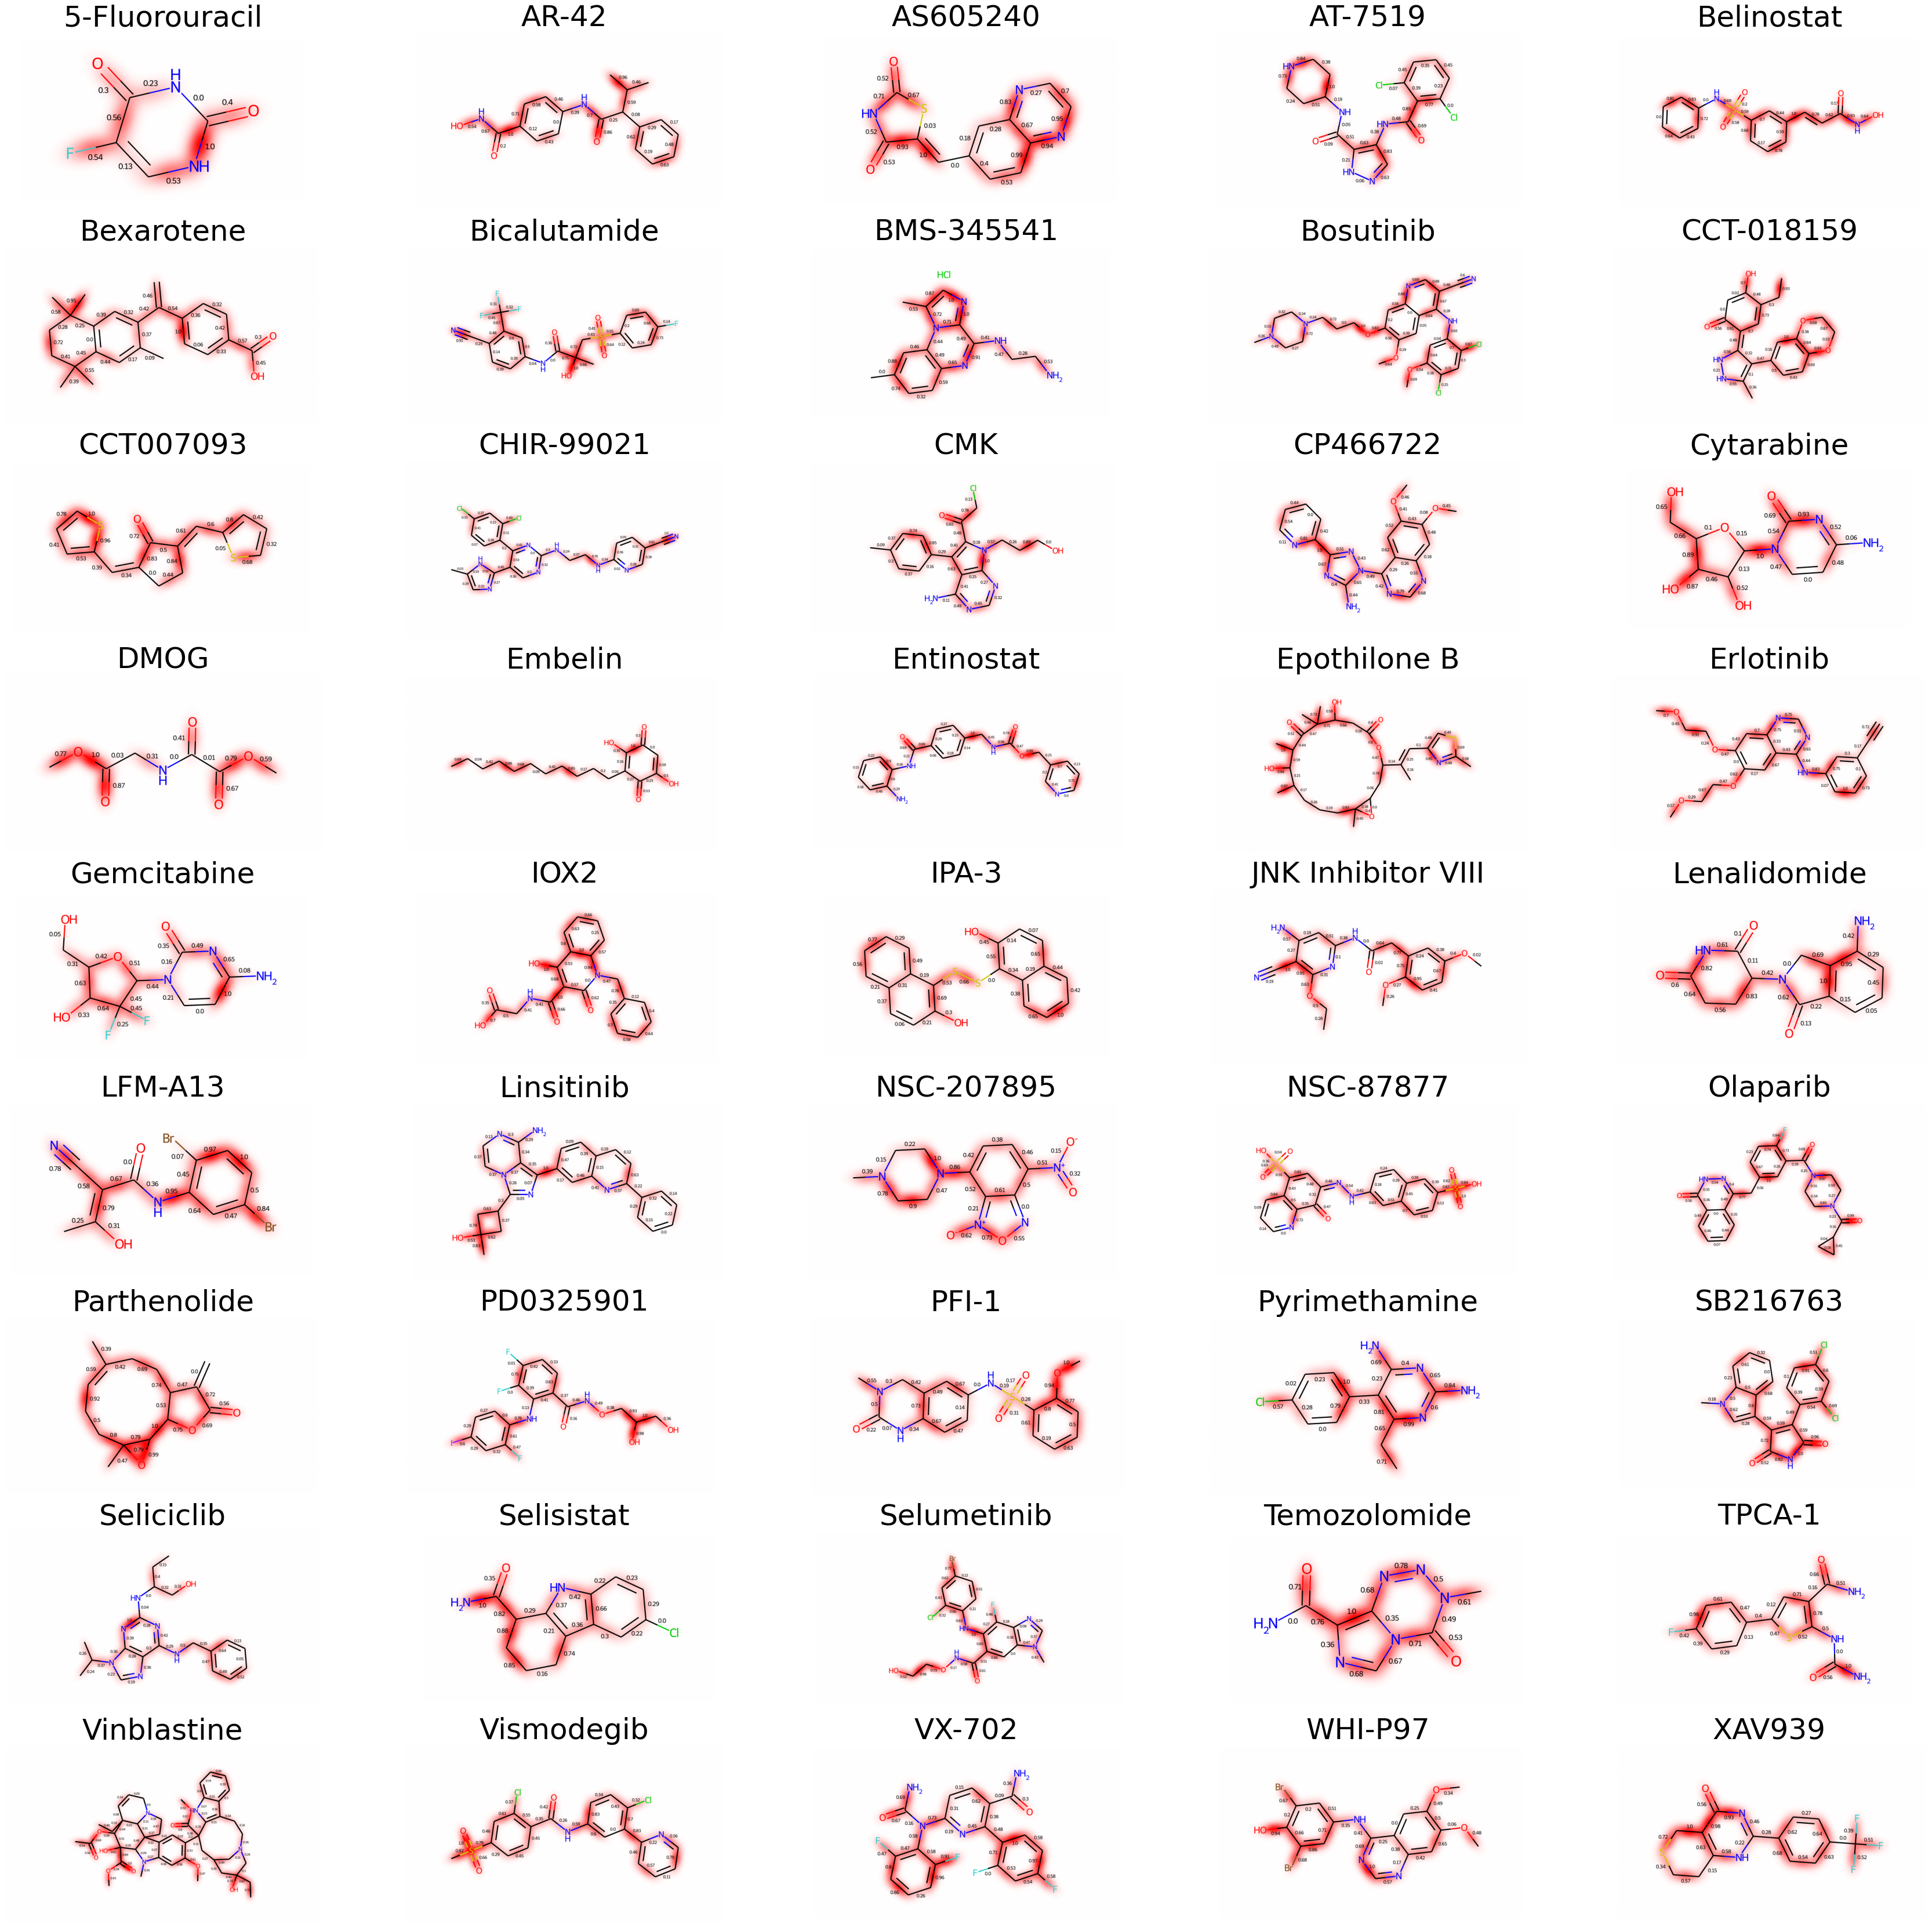

In [23]:
c, r = 5, 9
# fig, axs = plt.subplots(c, r)
fig = plt.figure(1, figsize=[60, 60])

# for j in range(r):
#     for i in range(c):
#         fileid = i + 5*j
#         if fileid > 222:
#             break
#         filename = file_list[fileid]
#         img = mpimg.imread(os.path.join(path, filename))
#         plt.subplot(r, c, fileid+1)
#         plt.imshow(img)
#         axs[i, j].plot(img)
#         axs[i, j].set_title()

for i in range(len(file_list)):
    filename = file_list[i]
#     print(filename)
    img = mpimg.imread(os.path.join(path, filename))
    plt.subplot(r, c, i+1)
    plt.title(filename.split('.')[0], fontdict={'fontsize': 50})
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [24]:
fig.tight_layout()
fig.savefig(os.path.join(path, 'assembled.png'), bbox_inches='tight', dpi=100)